<a href="https://colab.research.google.com/github/saragamilmohamed/Arabic-Part-of-speech/blob/main/Arabic_part_of_speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

# Token classification

Token classification assigns a label to individual tokens in a sentence. One of the most common token classification tasks is Named Entity Recognition (NER). NER attempts to find a label for each entity in a sentence, such as a person, location, or organization.

This guide will show you how to:

1. Finetune [DistilBERT](https://huggingface.co/distilbert-base-uncased) on the [WNUT 17](https://huggingface.co/datasets/wnut_17) dataset to detect new entities.
2. Use your finetuned model for inference.

<Tip>
The task illustrated in this tutorial is supported by the following model architectures:

<!--This tip is automatically generated by `make fix-copies`, do not fill manually!-->

[ALBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/albert), [BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bert), [BigBird](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/big_bird), [BioGpt](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/biogpt), [BLOOM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/bloom), [CamemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/camembert), [CANINE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/canine), [ConvBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/convbert), [Data2VecText](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/data2vec-text), [DeBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta), [DeBERTa-v2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/deberta-v2), [DistilBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/distilbert), [ELECTRA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/electra), [ERNIE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie), [ErnieM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ernie_m), [ESM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/esm), [FlauBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/flaubert), [FNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/fnet), [Funnel Transformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/funnel), [GPT-Sw3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt-sw3), [OpenAI GPT-2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt2), [GPTBigCode](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_bigcode), [GPT Neo](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neo), [GPT NeoX](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/gpt_neox), [I-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/ibert), [LayoutLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlm), [LayoutLMv2](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv2), [LayoutLMv3](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/layoutlmv3), [LiLT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/lilt), [Longformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/longformer), [LUKE](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/luke), [MarkupLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/markuplm), [MEGA](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mega), [Megatron-BERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/megatron-bert), [MobileBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mobilebert), [MPNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/mpnet), [Nezha](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nezha), [Nyströmformer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/nystromformer), [QDQBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/qdqbert), [RemBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/rembert), [RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta), [RoBERTa-PreLayerNorm](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roberta-prelayernorm), [RoCBert](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roc_bert), [RoFormer](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/roformer), [SqueezeBERT](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/squeezebert), [XLM](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm), [XLM-RoBERTa](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta), [XLM-RoBERTa-XL](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlm-roberta-xl), [XLNet](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xlnet), [X-MOD](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/xmod), [YOSO](https://huggingface.co/docs/transformers/main/en/tasks/../model_doc/yoso)

<!--End of the generated tip-->

</Tip>

Before you begin, make sure you have all the necessary libraries installed:

```bash
pip install transformers datasets evaluate seqeval
```

We encourage you to login to your Hugging Face account so you can upload and share your model with the community. When prompted, enter your token to login:

In [2]:
from huggingface_hub import notebook_login

notebook_login()

## Load dataset

In [3]:
pip install pyconll

In [4]:
import pyconll
data= pyconll.load_from_file("/content/Arabic_POS.conllu")

Then take a look at an example:

In [5]:
sentences = []
labels = []

for sentence in data:
    tokens = []
    pos_tags = []
    for token in sentence:
        if token.form and token.upos:
            tokens.append(token.form)
            pos_tags.append(token.upos)
    sentences.append(tokens)
    labels.append(pos_tags)

In [6]:
sentences[0]

['برلين',
 'ترفض',
 'حصول',
 'شركة',
 'اميركية',
 'على',
 'رخصة',
 'تصنيع',
 'دبابة',
 '"',
 'ليوبارد',
 '"',
 'الالمانية']

In [7]:
labels[0]

['X',
 'VERB',
 'NOUN',
 'NOUN',
 'ADJ',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'PUNCT',
 'X',
 'PUNCT',
 'ADJ']

In [8]:
len(sentences),len(labels)

(6075, 6075)

## Splitting data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(sentences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [10]:
X_train[0]

['كشفت',
 'الأوراق',
 'و',
 'المستندات',
 'أن',
 'المستشفى',
 'تهرب',
 'من',
 'طلبات',
 'المستشفيات',
 'الحكومية',
 'من',
 'الدم',
 'ب',
 'اعتبار',
 'ها',
 'تأخذ',
 'الدم',
 'مجاناً',
 'و',
 'كان',
 'يتم',
 'إبلاغ',
 'غرفة',
 'الطوارئ',
 'ب',
 'وزارة',
 'الصحة',
 'ب',
 'كميات',
 'دم',
 'أقل',
 'من',
 'ما',
 'هو',
 'مدون',
 'ب',
 'الأوراق',
 'الرسمية',
 'ل',
 'عدم',
 'الاستعانة',
 'ب',
 'كميات',
 'الدم',
 'في',
 'الحوادث',
 'و',
 'حالات',
 'النزيف',
 'الحاد',
 '.']

In [11]:
len(X_train), len(X_val), len(X_test)

(4860, 850, 365)

In [12]:
unique_labels = sorted(set(tag for sent in y_train for tag in sent))
label2id = {label: i for i, label in enumerate(unique_labels)}
id2label = {i: label for label, i in label2id.items()}

In [13]:
id2label

{0: 'ADJ',
 1: 'ADP',
 2: 'ADV',
 3: 'AUX',
 4: 'CCONJ',
 5: 'DET',
 6: 'INTJ',
 7: 'NOUN',
 8: 'NUM',
 9: 'PART',
 10: 'PRON',
 11: 'PROPN',
 12: 'PUNCT',
 13: 'SCONJ',
 14: 'SYM',
 15: 'VERB',
 16: 'X'}

The next step is to load a DistilBERT tokenizer to preprocess the `tokens` field:

In [14]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

As you saw in the example `tokens` field above, it looks like the input has already been tokenized. But the input actually hasn't been tokenized yet and you'll need to set `is_split_into_words=True` to tokenize the words into subwords. For example:

In [15]:
example = sentences[0]
tokenized_input = tokenizer(example, is_split_into_words=True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
tokens

['[CLS]',
 'برلين',
 'ترفض',
 'حصول',
 'شركة',
 'اميركية',
 'على',
 'رخصة',
 'تصنيع',
 'دب',
 '##ابة',
 '"',
 'ليو',
 '##بار',
 '##د',
 '"',
 'الالمانية',
 '[SEP]']

However, this adds some special tokens `[CLS]` and `[SEP]` and the subword tokenization creates a mismatch between the input and labels. A single word corresponding to a single label may now be split into two subwords. You'll need to realign the tokens and labels by:

1. Mapping all tokens to their corresponding word with the [`word_ids`](https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.BatchEncoding.word_ids) method.
2. Assigning the label `-100` to the special tokens `[CLS]` and `[SEP]` so they're ignored by the PyTorch loss function.
3. Only labeling the first token of a given word. Assign `-100` to other subtokens from the same word.

Here is how you can create a function to realign the tokens and labels, and truncate sequences to be no longer than DistilBERT's maximum input length:

In [16]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(
        examples["tokens"], truncation=True, is_split_into_words=True, padding="max_length"
    )

    labels = []
    for i, label in enumerate(examples[f"ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label2id.get(label[word_idx], -100))
            else:
                label_ids.append(-100)
            previous_word_idx = word_idx
        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

To apply the preprocessing function over the entire dataset, use 🤗 Datasets [map](https://huggingface.co/docs/datasets/main/en/package_reference/main_classes#datasets.Dataset.map) function. You can speed up the `map` function by setting `batched=True` to process multiple elements of the dataset at once:

In [17]:
from datasets import Dataset, DatasetDict
import pandas as pd


train_df = pd.DataFrame({'tokens': X_train, 'ner_tags': y_train})

val_df = pd.DataFrame({'tokens': X_val, 'ner_tags': y_val})

test_df = pd.DataFrame({'tokens': X_test, 'ner_tags': y_test})

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

tokenized_data= DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})


tokenized_data = tokenized_data.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/4860 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/850 [00:00<?, ? examples/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]

Now create a batch of examples using [DataCollatorWithPadding](https://huggingface.co/docs/transformers/main/en/main_classes/data_collator#transformers.DataCollatorWithPadding). It's more efficient to *dynamically pad* the sentences to the longest length in a batch during collation, instead of padding the whole dataset to the maximum length.

In [18]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer, return_tensors="tf")

In [19]:
data_collator

DataCollatorForTokenClassification(tokenizer=BertTokenizerFast(name_or_path='asafaya/bert-base-arabic', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
), padding=True, max_length=None, pad_to_multiple_of=None

## Evaluate

Including a metric during training is often helpful for evaluating your model's performance. You can quickly load a evaluation method with the 🤗 [Evaluate](https://huggingface.co/docs/evaluate/index) library. For this task, load the [seqeval](https://huggingface.co/spaces/evaluate-metric/seqeval) framework (see the 🤗 Evaluate [quick tour](https://huggingface.co/docs/evaluate/a_quick_tour) to learn more about how to load and compute a metric). Seqeval actually produces several scores: precision, recall, F1, and accuracy.

In [20]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.6 MB/s eta 0:00:00


In [21]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=fe47f1b96f1166cc937cc6d0130194f136474d78343d596ba84aabf0a4be2e4d
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [ ]:
import evaluate

seqeval = evaluate.load("seqeval")

Get the NER labels first, and then create a function that passes your true predictions and true labels to [compute](https://huggingface.co/docs/evaluate/main/en/package_reference/main_classes#evaluate.EvaluationModule.compute) to calculate the scores:

In [22]:
from seqeval.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)

    batch_size, seq_len = preds.shape
    true_labels = []
    true_predictions = []

    for i in range(batch_size):
        pred_tags = []
        true_tags = []

        for j in range(seq_len):
            if label_ids[i][j] != -100:
                true_tags.append(id2label[label_ids[i][j]])
                pred_tags.append(id2label[preds[i][j]])

        true_labels.append(true_tags)
        true_predictions.append(pred_tags)

    return true_predictions, true_labels


Your `compute_metrics` function is ready to go now, and you'll return to it when you setup your training.

In [23]:
def compute_metrics(p):
    predictions, labels = p
    preds, refs = align_predictions(predictions, labels)

    return {
        "accuracy": accuracy_score(refs, preds),
        "f1": f1_score(refs, preds),
        "precision": precision_score(refs, preds),
        "recall": recall_score(refs, preds),
    }


## Train

<Tip>

If you aren't familiar with finetuning a model with Keras, take a look at the basic tutorial [here](https://huggingface.co/docs/transformers/main/en/tasks/../training#train-a-tensorflow-model-with-keras)!

</Tip>
To finetune a model in TensorFlow, start by setting up an optimizer function, learning rate schedule, and some training hyperparameters:

In [24]:
from transformers import create_optimizer

batch_size = 16
num_train_epochs = 3
num_train_steps = (len(tokenized_data["train"]) // batch_size) * num_train_epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01,
    num_warmup_steps=0,
)

Then you can load DistilBERT with [TFAutoModelForTokenClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.TFAutoModelForTokenClassification) along with the number of expected labels, and the label mappings:

In [25]:
from transformers import TFAutoModelForTokenClassification

model = TFAutoModelForTokenClassification.from_pretrained(
    "asafaya/bert-base-arabic", num_labels=17, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Convert your datasets to the `tf.data.Dataset` format with [prepare_tf_dataset()](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.TFPreTrainedModel.prepare_tf_dataset):

In [26]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_validation_set = model.prepare_tf_dataset(
    tokenized_data["validation"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

Configure the model for training with [`compile`](https://keras.io/api/models/model_training_apis/#compile-method). Note that Transformers models all have a default task-relevant loss function, so you don't need to specify one unless you want to:

In [27]:
import tensorflow as tf

model.compile(optimizer=optimizer)  # No loss argument!

The last two things to setup before you start training is to compute the seqeval scores from the predictions, and provide a way to push your model to the Hub. Both are done by using [Keras callbacks](https://huggingface.co/docs/transformers/main/en/tasks/../main_classes/keras_callbacks).

Pass your `compute_metrics` function to [KerasMetricCallback](https://huggingface.co/docs/transformers/main/en/main_classes/keras_callbacks#transformers.KerasMetricCallback):

In [28]:
from transformers.keras_callbacks import KerasMetricCallback

metric_callback = KerasMetricCallback(metric_fn=compute_metrics, eval_dataset=tf_validation_set)

Specify where to push your model and tokenizer in the [PushToHubCallback](https://huggingface.co/docs/transformers/main/en/main_classes/keras_callbacks#transformers.PushToHubCallback):

In [31]:
from transformers.keras_callbacks import PushToHubCallback
from huggingface_hub import HfFolder, notebook_login, login


login()


token = HfFolder.get_token()

push_to_hub_callback = PushToHubCallback(
    output_dir="saraaaaaaaaaaaaaa/first_pos_project",
    tokenizer=tokenizer,
    hub_token=token,
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/saraaaaaaaaaaaaaa/first_pos_project into local empty directory.


Download file tf_model.h5:   0%|          | 8.00k/420M [00:00<?, ?B/s]

Clean file tf_model.h5:   0%|          | 1.00k/420M [00:00<?, ?B/s]

Then bundle your callbacks together:

In [32]:
callbacks = [metric_callback, push_to_hub_callback]

Finally, you're ready to start training your model! Call [`fit`](https://keras.io/api/models/model_training_apis/#fit-method) with your training and validation datasets, the number of epochs, and your callbacks to finetune the model:

In [33]:
!git config --global user.email "sgamil677@gmail.com"
!git config --global user.name "saraaaaaaaaaaaaaa"

In [34]:
import numpy as np

In [35]:
model.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3, callbacks=callbacks)

Epoch 1/3
303/303 [==============================] - ETA: 0s - loss: 0.4636

/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NOUN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ADJ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ADP seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PROPN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: X seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: Us

303/303 [==============================] - 211s 620ms/step - loss: 0.4636 - val_loss: 0.1392 - accuracy: 0.9619 - f1: 0.9455 - precision: 0.9489 - recall: 0.9421
Epoch 2/3
303/303 [==============================] - ETA: 0s - loss: 0.1257

/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NOUN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ADJ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ADP seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PROPN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: X seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: Us

303/303 [==============================] - 177s 586ms/step - loss: 0.1257 - val_loss: 0.1173 - accuracy: 0.9677 - f1: 0.9540 - precision: 0.9562 - recall: 0.9518
Epoch 3/3
303/303 [==============================] - ETA: 0s - loss: 0.1031

/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NOUN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ADJ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: ADP seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PROPN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: X seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: Us

303/303 [==============================] - 187s 617ms/step - loss: 0.1031 - val_loss: 0.1133 - accuracy: 0.9691 - f1: 0.9560 - precision: 0.9584 - recall: 0.9535


Once training is completed, your model is automatically uploaded to the Hub so everyone can use it!

<Tip>

For a more in-depth example of how to finetune a model for token classification, take a look at the corresponding
[PyTorch notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/token_classification.ipynb)
or [TensorFlow notebook](https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/token_classification-tf.ipynb).

</Tip>

## Inference

Great, now that you've finetuned a model, you can use it for inference!

Grab some text you'd like to run inference on:

In [36]:
text = "هنا الدُّنيا وهُناك .. هناك الجنَّة حيثُ لَا شَيء يَسلُبه الزَّمَانُ مِنك"

The simplest way to try out your finetuned model for inference is to use it in a [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline). Instantiate a `pipeline` for NER with your model, and pass your text to it:

In [38]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("token-classification", model="saraaaaaaaaaaaaaa/first_pos_project")

Some layers from the model checkpoint at saraaaaaaaaaaaaaa/first_pos_project were not used when initializing TFBertForTokenClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at saraaaaaaaaaaaaaa/first_pos_project.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.
Device set to use 0


In [42]:
pipe(text)

[{'entity': 'ADV',
  'score': np.float32(0.85511446),
  'index': 1,
  'word': 'هنا',
  'start': np.int32(0),
  'end': np.int32(3)},
 {'entity': 'NOUN',
  'score': np.float32(0.89493024),
  'index': 2,
  'word': 'الدنيا',
  'start': np.int32(4),
  'end': np.int32(12)},
 {'entity': 'ADV',
  'score': np.float32(0.5937242),
  'index': 3,
  'word': 'وهناك',
  'start': np.int32(13),
  'end': np.int32(19)},
 {'entity': 'PUNCT',
  'score': np.float32(0.91522944),
  'index': 4,
  'word': '.',
  'start': np.int32(20),
  'end': np.int32(21)},
 {'entity': 'PUNCT',
  'score': np.float32(0.8975495),
  'index': 5,
  'word': '.',
  'start': np.int32(21),
  'end': np.int32(22)},
 {'entity': 'ADV',
  'score': np.float32(0.8971774),
  'index': 6,
  'word': 'هناك',
  'start': np.int32(23),
  'end': np.int32(27)},
 {'entity': 'NOUN',
  'score': np.float32(0.9547663),
  'index': 7,
  'word': 'الجنة',
  'start': np.int32(28),
  'end': np.int32(35)},
 {'entity': 'CCONJ',
  'score': np.float32(0.97763526),
  '

You can also manually replicate the results of the `pipeline` if you'd like:

Tokenize the text and return TensorFlow tensors:

In [51]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("saraaaaaaaaaaaaaa/first_pos_project")

inputs = tokenizer(text, return_tensors="tf")

Pass your inputs to the model and return the `logits`:

In [54]:
from transformers import TFAutoModelForTokenClassification

model = TFAutoModelForTokenClassification.from_pretrained("saraaaaaaaaaaaaaa/first_pos_project")
logits = model(**inputs).logits

Some layers from the model checkpoint at saraaaaaaaaaaaaaa/first_pos_project were not used when initializing TFBertForTokenClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForTokenClassification were initialized from the model checkpoint at saraaaaaaaaaaaaaa/first_pos_project.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForTokenClassification for predictions without further training.


Get the class with the highest probability, and use the model's `id2label` mapping to convert it to a text label:

In [55]:
predicted_token_class_ids = tf.math.argmax(logits, axis=-1)
predicted_token_class = [model.config.id2label[t] for t in predicted_token_class_ids[0].numpy().tolist()]
predicted_token_class

['NOUN',
 'ADV',
 'NOUN',
 'ADV',
 'PUNCT',
 'PUNCT',
 'ADV',
 'NOUN',
 'CCONJ',
 'PART',
 'NOUN',
 'VERB',
 'VERB',
 'ADP',
 'NOUN',
 'ADP',
 'ADV']

## Evaluate Model

In [58]:
import numpy as np
from tqdm import tqdm
# from sklearn.metrics import classification_report # Remove scikit-learn's classification_report
from transformers import TFAutoModelForTokenClassification
from seqeval.metrics import classification_report # Import seqeval's classification_report

# Prepare test data
tf_test_set = model.prepare_tf_dataset(
    tokenized_data["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

all_predictions = []
all_labels = []

# Determine the maximum sequence length across all batches
max_len = 0
for batch in tqdm(tf_test_set, desc="Determining max length"):
    # We can get the sequence length from the input_ids shape
    # batch[0] contains the input features (like 'input_ids')
    max_len = max(max_len, batch[0]['input_ids'].shape[1])

# Now iterate through the dataset again to get predictions and pad
for batch in tqdm(tf_test_set, desc="Processing batches"):
    predictions = model.predict(batch)
    logits = predictions.logits
    # batch[1] contains the labels
    label_ids = batch[1].numpy()

    # Get the current sequence length of the batch
    current_seq_len = logits.shape[1]

    padded_logits = np.pad(logits, ((0, 0), (0, max_len - current_seq_len), (0, 0)), 'constant', constant_values=0)
    padded_label_ids = np.pad(label_ids, ((0, 0), (0, max_len - current_seq_len)), 'constant', constant_values=-100)

    all_predictions.append(padded_logits)
    all_labels.append(padded_label_ids)

# Now concatenate the padded arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# No need for additional padding here as it was done during the batch processing
y_pred, y_true = align_predictions(all_predictions, all_labels)

# Use seqeval's classification_report which supports the list of lists format
print(classification_report(y_true, y_pred))

Processing batches:   0%|          | 0/23 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Processing batches:   4%|▍         | 1/23 [00:03<01:09,  3.15s/it]

1/1 [==============================] - 5s 5s/step


Processing batches:   9%|▊         | 2/23 [00:08<01:31,  4.35s/it]

1/1 [==============================] - 0s 147ms/step


Processing batches:  13%|█▎        | 3/23 [00:08<00:49,  2.46s/it]

1/1 [==============================] - 0s 99ms/step


Processing batches:  17%|█▋        | 4/23 [00:08<00:29,  1.55s/it]

1/1 [==============================] - 0s 173ms/step


Processing batches:  22%|██▏       | 5/23 [00:08<00:19,  1.07s/it]

1/1 [==============================] - 0s 129ms/step


Processing batches:  26%|██▌       | 6/23 [00:09<00:13,  1.30it/s]

1/1 [==============================] - 0s 139ms/step


Processing batches:  30%|███       | 7/23 [00:09<00:09,  1.70it/s]

1/1 [==============================] - 0s 159ms/step


Processing batches:  35%|███▍      | 8/23 [00:09<00:07,  2.13it/s]

1/1 [==============================] - 0s 101ms/step


Processing batches:  39%|███▉      | 9/23 [00:09<00:05,  2.69it/s]

1/1 [==============================] - 0s 175ms/step


Processing batches:  43%|████▎     | 10/23 [00:09<00:04,  3.05it/s]

1/1 [==============================] - 0s 97ms/step


Processing batches:  48%|████▊     | 11/23 [00:10<00:03,  3.61it/s]

1/1 [==============================] - 0s 112ms/step


Processing batches:  52%|█████▏    | 12/23 [00:10<00:02,  4.08it/s]

1/1 [==============================] - 0s 146ms/step


Processing batches:  57%|█████▋    | 13/23 [00:10<00:02,  4.20it/s]

1/1 [==============================] - 0s 164ms/step


Processing batches:  61%|██████    | 14/23 [00:10<00:02,  4.30it/s]

1/1 [==============================] - 0s 122ms/step


Processing batches:  65%|██████▌   | 15/23 [00:10<00:01,  4.39it/s]

1/1 [==============================] - 0s 107ms/step


Processing batches:  70%|██████▉   | 16/23 [00:11<00:01,  4.80it/s]

1/1 [==============================] - 0s 119ms/step


Processing batches:  74%|███████▍  | 17/23 [00:11<00:01,  5.01it/s]

1/1 [==============================] - 0s 111ms/step


Processing batches:  78%|███████▊  | 18/23 [00:11<00:01,  4.89it/s]

1/1 [==============================] - 0s 116ms/step


Processing batches:  83%|████████▎ | 19/23 [00:11<00:00,  5.15it/s]

1/1 [==============================] - 0s 136ms/step


Processing batches:  87%|████████▋ | 20/23 [00:11<00:00,  5.17it/s]

1/1 [==============================] - 0s 170ms/step


Processing batches:  91%|█████████▏| 21/23 [00:12<00:00,  4.09it/s]

1/1 [==============================] - 0s 99ms/step


Processing batches:  96%|█████████▌| 22/23 [00:12<00:00,  4.28it/s]

1/1 [==============================] - 0s 99ms/step


Processing batches: 100%|██████████| 23/23 [00:20<00:00,  1.12it/s]
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: CCONJ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VERB seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: X seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: SCONJ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PUNCT seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/l

              precision    recall  f1-score   support

         ART       0.94      0.90      0.92        88
        CONJ       0.99      0.99      0.99      1179
          DJ       0.94      0.94      0.94      1267
          DP       0.99      0.99      0.99      2004
          DV       0.98      0.90      0.94        52
         ERB       0.98      0.99      0.98       986
          ET       0.93      0.98      0.95       254
         OUN       0.92      0.93      0.93      3129
         RON       1.00      1.00      1.00       505
        ROPN       0.83      0.59      0.69        17
          UM       0.99      0.98      0.98       348
        UNCT       0.99      1.00      0.99       945
          UX       0.91      0.94      0.92       103
          YM       1.00      0.78      0.88        23
           _       0.84      0.68      0.75       665

   micro avg       0.96      0.95      0.95     11565
   macro avg       0.95      0.91      0.92     11565
weighted avg       0.95   

/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: CCONJ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: VERB seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: X seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: SCONJ seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PUNCT seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/sequence_labeling.py:171

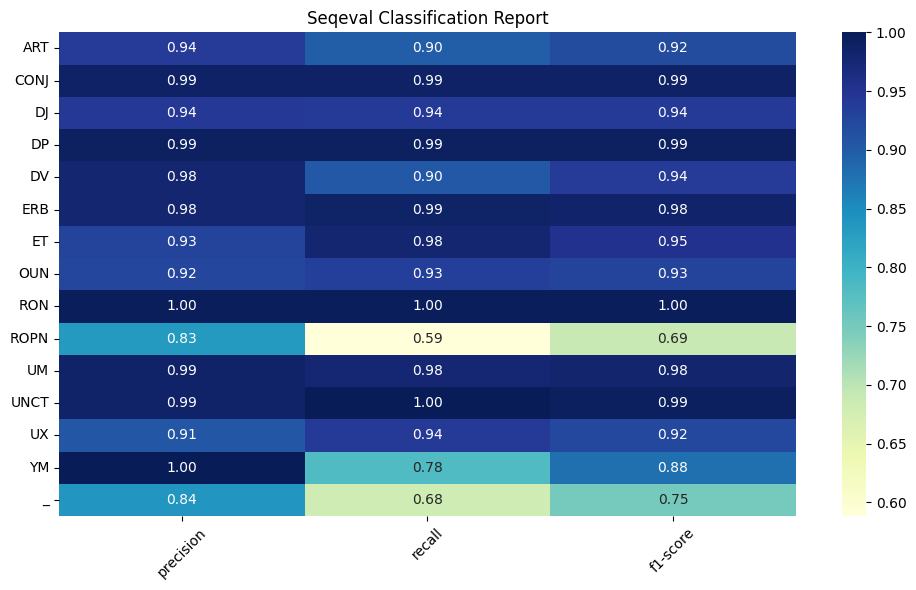

In [62]:
from seqeval.metrics import classification_report
# from seqeval.metrics import performance_report # Remove this line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate report in dictionary form
# Only one import for classification_report is needed
from seqeval.metrics import classification_report as seqeval_report

report_dict = seqeval_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Drop overall summary rows if you want per-label detail only
per_label_df = report_df.drop(["micro avg", "macro avg", "weighted avg", "accuracy"], errors="ignore")
plt.figure(figsize=(10, 6))
sns.heatmap(per_label_df[["precision", "recall", "f1-score"]], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Seqeval Classification Report")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()